In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_49422_U')

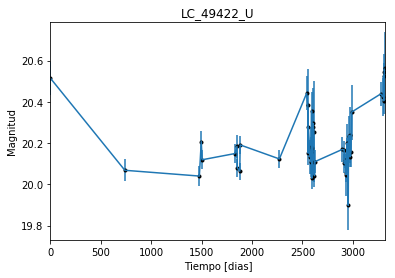

In [2]:
data = np.genfromtxt('LC_49422_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_49422_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

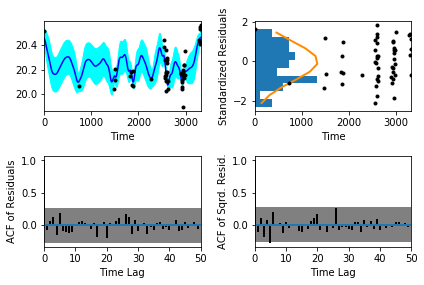

In [5]:
sample.assess_fit()

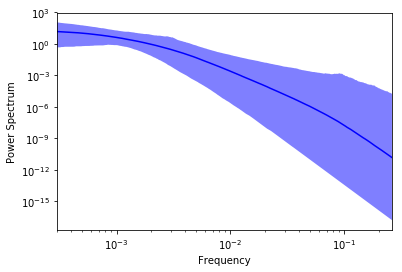

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_49422_U')

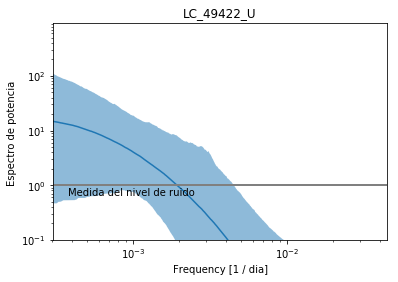

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_49422_U')

Text(0.5,1,'Prediccion , valor esperado LC_49422_U')

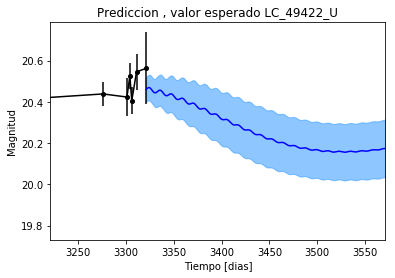

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_49422_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_ 49422_U')

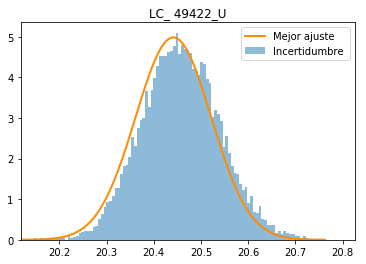

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_ 49422_U')

Text(0.5,1,'Interpolacion, camino simulado LC_49422_U')

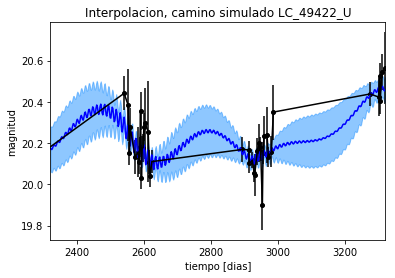

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_49422_U')

Text(0.5,1,'Interpolacion, camino simulado LC_49422_U')

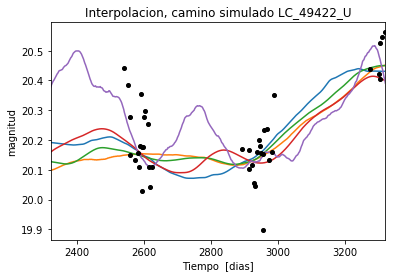

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_49422_U')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1749.53427753
Median: 0.0061353136666
Standard deviation: 0.102192624002
68% credibility interval: [ 0.00071088  0.09803204]
95% credibility interval: [  3.44367536e-04   4.06966855e-01]
99% credibility interval: [  3.12436335e-04   4.95176587e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 683.670143768
Median: 0.00151237938917
Standard deviation: 0.0451919681734
68% credibility interval: [ 0.00045459  0.01490071]
95% credibility interval: [ 0.00032271  0.16313808]
99% credibility interval: [  3.05462358e-04   3.33806878e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 756.521890033
Median: 0.0103940236268
Standard 

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2002.95653454
Median: 64.1025136273
Standard deviation: 1.45333105548
68% credibility interval: [ 62.44510274  65.10538975]
95% credibility interval: [ 60.15318546  65.59509029]
99% credibility interval: [ 58.15072992  65.80426313]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 694.275960017
Median: 0.366255634055
Standard deviation: 1.1308942785
68% credibility interval: [ 0.03926982  2.08674867]
95% credibility interval: [ 0.01303095  3.820214  ]
99% credibility interval: [ 0.00927719  5.15231647]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 678.313650772
Median: 0.133561312347
Standard deviation: 2.28627221288
68% credibility interval: [ 0.00558976  2.36676153]
95% credibility interval: [  3.73605106e-04

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 313.936927019
Median: 8.76154917002e-42
Standard deviation: 2.38697466081e+36
68% credibility interval: [  5.58700317e-99   1.51850576e-15]
95% credibility interval: [  5.15702906e-217   1.29138281e+006]
99% credibility interval: [  9.72203051e-232   3.42361441e+031]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3146.71133514
Median: 20.2291402571
Standard deviation: 0.104513079297
68% credibility interval: [ 20.15338769  20.32223206]
95% credibility interval: [ 20.05288651  20.4658727 ]
99% credibility interval: [ 19.92138998  20.62150438]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 675.413136157
Median: 0.00339363803005
Standard deviation: 0.124660264113
68% credibility interval: [ 0.          0.18232348]
95% credibility interval: [ 0.          0.45717953]
99% credibility interval: [ 0.          0.50402864]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 675.413136157
Median: 0.00339363803005
Standard deviation: 0.124660264113
68% credibility interval: [ 0.          0.18232348]
95% credibility interval: [ 0.          0.45717953]
99% credibility interval: [ 0.          0.50402864]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1264.5604073
Median: 0.0
Standard deviation: 0.000781624024895
68% c

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2002.95653454
Median: 64.1025136273
Standard deviation: 1.45333105548
68% credibility interval: [ 62.44510274  65.10538975]
95% credibility interval: [ 60.15318546  65.59509029]
99% credibility interval: [ 58.15072992  65.80426313]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2667.29364122
Median: 0.0325523652015
Standard deviation: 0.0492025997075
68% credibility interval: [ 0.01763975  0.06841588]
95% credibility interval: [ 0.01038044  0.16923709]
99% credibility interval: [ 0.00788274  0.33065137]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2510.00619205
Median: 1.17218063822
Standard deviation: 0.187057516694
68% credibility interval: [ 1.0052379   1.37696268]
95% credibility interval: [ 0.8756398   1.60213816]
99% credibility interval: [ 0.78838901  1.76399523]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2326.48223139
Median: 2.7122507704e-05
Standard deviation: 0.0192471237004
68% credibility interval: [  5.14423315e-07   1.24987550e-03]
95% credibility interval: [  1.10744785e-11   2.78914311e-02]
99% credibility interval: [  8.61684704e-35   1.32113965e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1749.53427753
Median: (-0.0385493126849+0j)
Standard deviation: 1.01281193247
68% credibility interval: [-0.61595345+0.j        -0.00446657-0.0058749j]
95% credibility interval: [ -2.55704816e+00+0.j          -2.16372504e-03-1.89988482j]
99% credibility interval: [ -3.11128626e+00+0.j          -1.96309539e-03-2.13921713j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 683.670143768
Median: (-0.00950255995692+0.880715241481j)
Standard deviation: 0.833144103593
68% credibility interval: [-0.09362392+0.07025594j -0.00285630+0.09946849j]
95% credibility interval: [-1.02502680 +8.24457713e-01j -0.00202767 +1.87433940e-04j]
99% credibility interval: [ -2.09737047e+00+0.40188719j  -1.91927660e-03+0.j        ]
Posterior summa